C:\Users\Youyou Du\AppData\Local\Temp\ipykernel_27792\95775342.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=risk_df, y="employee", x="negative_msg_count", palette="Reds_r")


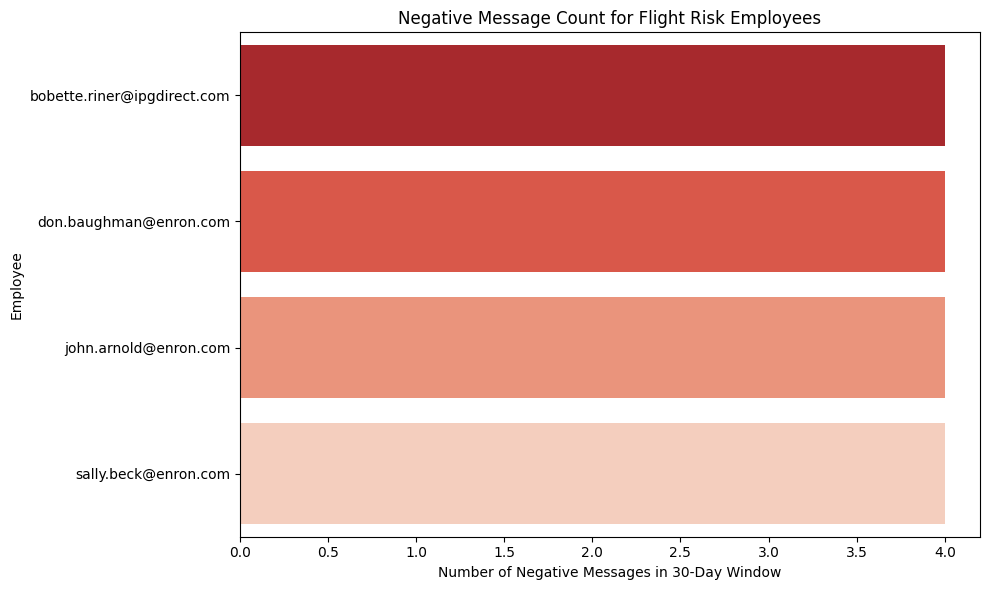

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("sentiment_practice_output.csv")
df["date"] = pd.to_datetime(df["date"], dayfirst=True)

# Filter negative messages
negative_df = df[df["sentiment"] == "Negative"].copy()
negative_df = negative_df.sort_values(by=["from", "date"])

# Identify flight risk employees and capture message counts in 30-day window
flight_risk_counts = {}
grouped = negative_df.groupby("from")

for employee, group in grouped:
    group = group.reset_index(drop=True)
    for i in range(len(group)):
        start_date = group.loc[i, "date"]
        window = group[(group["date"] >= start_date) & (group["date"] < start_date + pd.Timedelta(days=30))]
        if len(window) >= 4:
            flight_risk_counts[employee] = len(window)
            break

# Bar chart: negative message count per flagged employee
if flight_risk_counts:
    risk_df = pd.DataFrame({
        "employee": list(flight_risk_counts.keys()),
        "negative_msg_count": list(flight_risk_counts.values())
    }).sort_values(by="negative_msg_count", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=risk_df, y="employee", x="negative_msg_count", palette="Reds_r")
    plt.title("Negative Message Count for Flight Risk Employees")
    plt.xlabel("Number of Negative Messages in 30-Day Window")
    plt.ylabel("Employee")
    plt.tight_layout()
    plt.savefig("flight_risk_negative_msg_count.png")
    plt.show()
